In [ ]:
#Taher Barwaniwala
#BE-COMP
#Roll no 21

In [ ]:
!pip install tensorflow keras

In [ ]:
!pip install opendatasets

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia", force=True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajsutarvcet
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:19<00:00, 126MB/s] 


In [ ]:
dataset_dir = "chest-xray-pneumonia/chest_xray/"
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:
# Data preprocessing
batch_size = 40
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build the AI model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/10
131/131 [==============================] - 178s 1s/step - loss: 0.3815 - accuracy: 0.8307 - val_loss: 0.4708 - val_accuracy: 0.8029
Epoch 2/10
131/131 [==============================] - 176s 1s/step - loss: 0.2411 - accuracy: 0.8961 - val_loss: 0.3195 - val_accuracy: 0.8574
Epoch 3/10
131/131 [==============================] - 185s 1s/step - loss: 0.2195 - accuracy: 0.9120 - val_loss: 0.3669 - val_accuracy: 0.8397
Epoch 4/10
131/131 [==============================] - 177s 1s/step - loss: 0.1996 - accuracy: 0.9224 - val_loss: 0.3777 - val_accuracy: 0.8446
Epoch 5/10
131/131 [==============================] - 177s 1s/step - loss: 0.1823 - accuracy: 0.9302 - val_loss: 0.3918 - val_accuracy: 0.8413
Epoch 6/10
131/131 [==============================] - 183s 1s/step - loss: 0.1804 - accuracy: 0.9310 - val_loss: 0.3750 - val_accuracy: 0.8397
Epoch 7/10
131/131 [==============================] - 178s 1s/step - loss: 0.1558 - accuracy: 0.9434 - val_loss: 0.5179 - val_accuracy: 0.8141

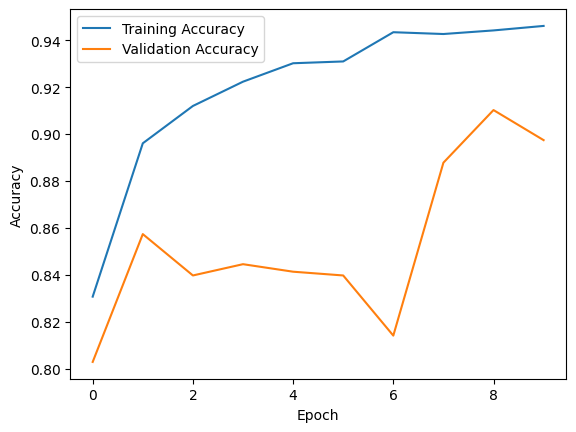

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()